In [14]:
import numpy as np
import scipy.ndimage
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import os
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest' 
matplotlib.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


In [15]:
#FPM_dir = os.path.normpath("/astro/opticslab1/SCDA/Apertures/InputMasks/FPM")
FPM_dir = os.path.normpath("/astro/opticslab1/SCDA/Apertures/InputMasks_v2/FPM")
if not os.path.exists(FPM_dir):
    os.mkdir(FPM_dir)
    print("created {:s} for FPM arrays".format(FPM_dir))
else:
    print("Destination {:s} already exists".format(FPM_dir))

Destination /astro/opticslab1/SCDA/Apertures/InputMasks_v2/FPM already exists


In [25]:
overwrite = True
M = 60 # array quadrant width of final gray-pixel approximation
binfac = 100 # bin factor between large binary array and gray-pixel approximation
L = 2*M*binfac # number of points across large binary array
dx = 1./L # step size between samples of large binary array 

In [26]:
xs = np.linspace(-L/2 + 0.5, L/2 - 0.5, L)/L

In [27]:
[Xs, Ys] = np.meshgrid(xs, xs)
Xs.shape

(12000, 12000)

In [28]:
inside_spot = np.less_equal(Xs**2 + Ys**2, 0.5**2)
big_FPM = np.zeros(Xs.shape)
big_FPM[inside_spot] = 1.

In [29]:
gray_FPM = big_FPM.reshape(big_FPM.shape[0]/binfac, binfac, big_FPM.shape[1]/binfac, binfac).mean(1).mean(2)
gray_FPM_quad = gray_FPM[M:,M:]
binary_FPM_quad = np.round(gray_FPM_quad).astype(int)

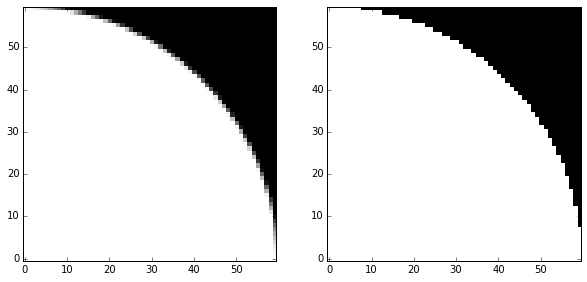

In [30]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(gray_FPM_quad)
plt.subplot(122)
plt.imshow(binary_FPM_quad)

In [31]:
gray_FPM_quad.shape

(60, 60)

In [34]:
FPM_quart_fits_fname = os.path.join(FPM_dir, "FPM_quart_occspot_M{:03d}.fits".format(M))
FPM_quart_hdu = fits.PrimaryHDU(gray_FPM_quad)

if not os.path.exists(FPM_quart_fits_fname) or overwrite is True:
    FPM_quart_hdu.writeto(FPM_quart_fits_fname, clobber=True)
    print("Wrote binned, cropped FPM FITS array to {0:s}".format(FPM_quart_fits_fname))
else:
    print("FPM FITS array {0:s} already exists, will not overwrite".format(FPM_quart_fits_fname))

Wrote binned, cropped FPM FITS array to /astro/opticslab1/SCDA/Apertures/InputMasks_v2/FPM/FPM_quart_occspot_M060.fits


In [33]:
FPM_quart_dat_fname = os.path.join(FPM_dir, "FPM_quart_occspot_M{:03d}.dat".format(M))

if not os.path.exists(FPM_quart_dat_fname) or overwrite is True:
    np.savetxt(FPM_quart_dat_fname, gray_FPM_quad, fmt='%.6f', delimiter=" ")
    #np.savetxt(FPM_quart_dat_fname, binary_FPM_quad, fmt='%d', delimiter=" ")
    print("Wrote binned, cropped FPM array to {0:s}".format(FPM_quart_dat_fname))
else:
    print("FPM array {0:s} already exists, will not overwrite".format(FPM_quart_dat_fname))

Wrote binned, cropped FPM array to /astro/opticslab1/SCDA/Apertures/InputMasks_v2/FPM/FPM_quart_occspot_M060.dat


In [35]:
os.listdir(FPM_dir)

['FPM_quart_occspot_M060.fits', 'FPM_quart_occspot_M060.dat']